# Case Study : Covid Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Dataset
dataset = pd.read_csv("covid19_Confirmed_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [12]:
dataset.shape

(266, 104)

# Now we will Delete useless columns

In [13]:
df = dataset.drop(["Lat","Long"], axis=1, inplace = True)

In [14]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


# We will now have the aggregated values for countries

In [15]:
corona_dataset_aggregated = dataset.groupby("Country/Region").sum()

In [16]:
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [17]:
ds= corona_dataset_aggregated.drop(["Province/State"], axis= 1, inplace= True)

In [18]:
corona_dataset_aggregated.shape

(187, 100)

# Now we will plot the values

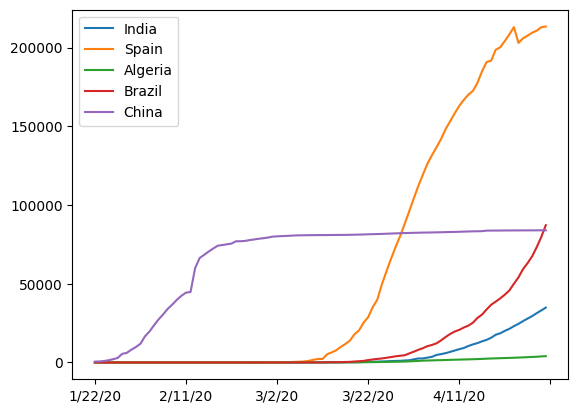

In [19]:
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
corona_dataset_aggregated.loc["Algeria"].plot()
corona_dataset_aggregated.loc["Brazil"].plot()
corona_dataset_aggregated.loc["China"].plot()
plt.legend()

<Axes: >

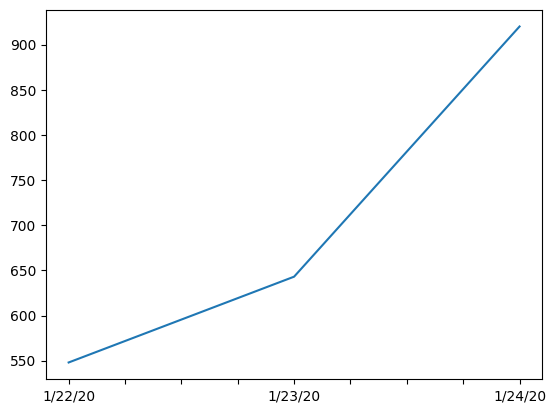

In [20]:
corona_dataset_aggregated.loc["China"][:3].plot()

<Axes: >

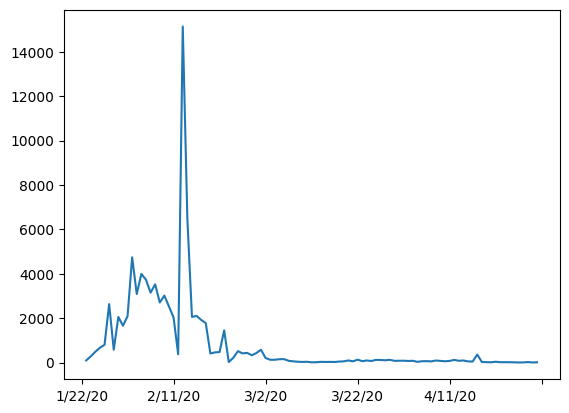

In [21]:
corona_dataset_aggregated.loc["China"].diff().plot()

# Max infection rate for various countries

In [22]:
corona_dataset_aggregated.loc["China"].diff().max()

np.float64(15136.0)

In [23]:
corona_dataset_aggregated.loc["India"].diff().max()

np.float64(1893.0)

In [24]:
corona_dataset_aggregated.loc["Spain"].diff().max()

np.float64(9630.0)

In [25]:
corona_dataset_aggregated.loc["US"].diff().max()

np.float64(36188.0)

# now we will find max infection rate for all countries 

In [26]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
   max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["Max_Infection_rate"] = max_infection_rates

In [27]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_Infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


# creating new DataFrame

In [28]:
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_Infection_rate"])

In [32]:
corona_data

,Max_Infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


# Now Importing world happiness file for further analysis

In [30]:
happy_report = pd.read_csv("worldwide_happiness_report.csv")

In [65]:
happy_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


# Now removing redundant coloums

In [7]:
useless = ["Overall rank","Generosity", "Perceptions of corruption", "Score"]

In [42]:
happy_report.rename(columns={"Country or region": "Country/Region"}, inplace=True)
happy_report.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country/Region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [43]:
happy_report.drop(useless, axis= 1, inplace= True)
happy_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [10]:
happy_report.shape

(156, 4)

In [34]:
corona_data.shape

(187, 1)

In [45]:
data = corona_data.join(happy_report, how = "inner")
data

,Max_Infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,,
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143


# Now we will look at the Correlation of the data

In [46]:
data.corr()

,Max_Infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_Infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


In [49]:
data

,Max_Infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,,
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143


# Visualisation

<Axes: xlabel='GDP per capita', ylabel='Max_Infection_rate'>

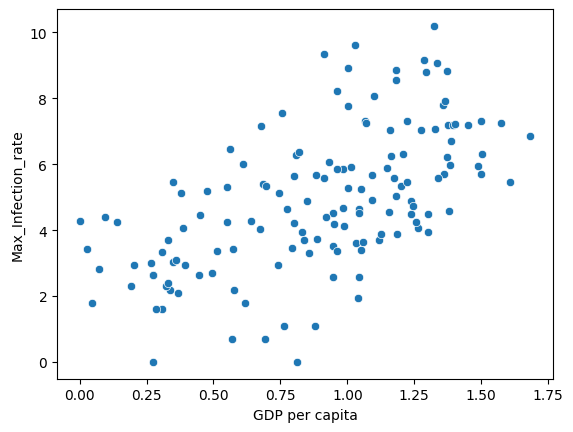

In [52]:
x = data["GDP per capita"]
y = data["Max_Infection_rate"]
sns.scatterplot(x=x,y=np.log(y)) #logscailing

<Axes: xlabel='GDP per capita', ylabel='Max_Infection_rate'>

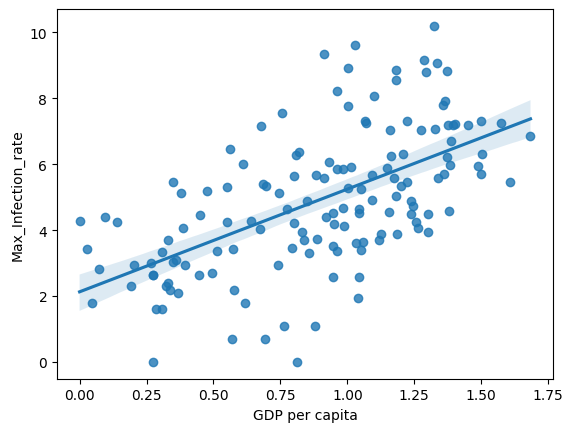

In [53]:
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_Infection_rate'>

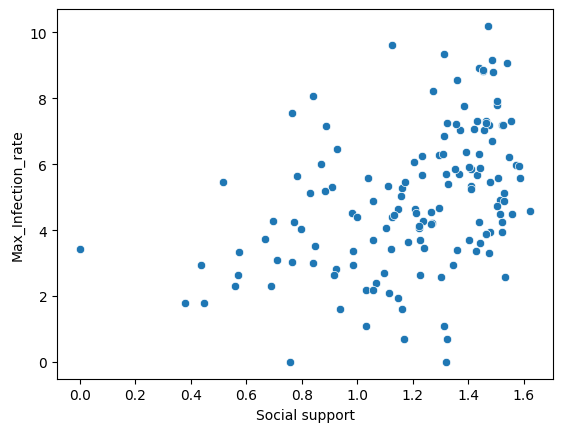

In [55]:
x = data["Social support"]
y = data["Max_Infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_Infection_rate'>

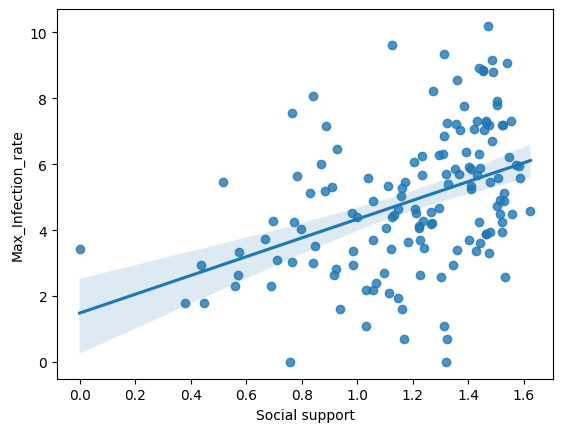

In [56]:
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_Infection_rate'>

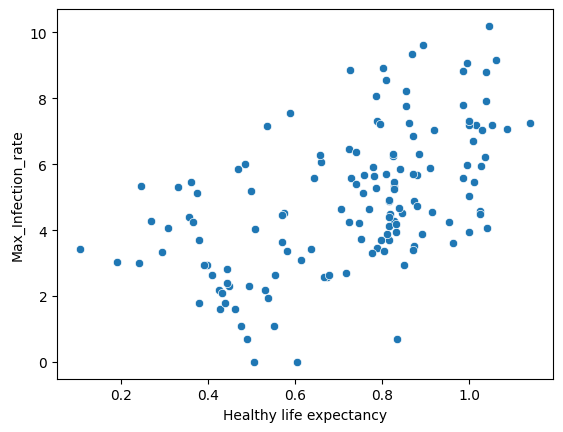

In [57]:
x = data["Healthy life expectancy"]
y = data["Max_Infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_Infection_rate'>

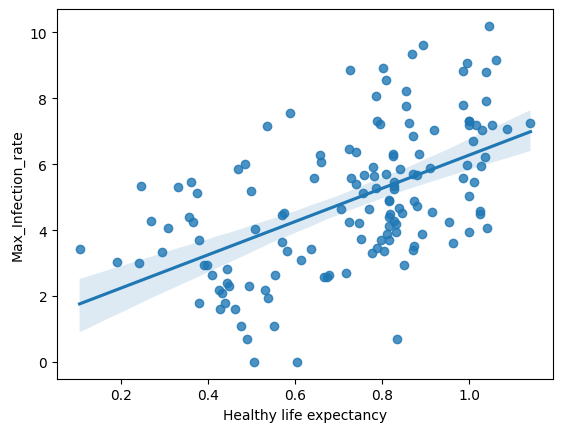

In [58]:
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_Infection_rate'>

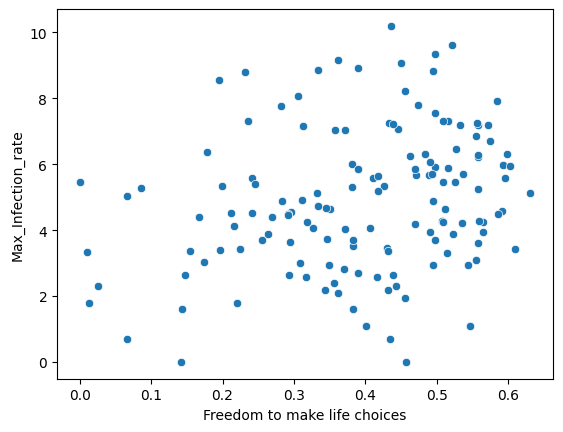

In [59]:
x = data["Freedom to make life choices"]
y = data["Max_Infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_Infection_rate'>

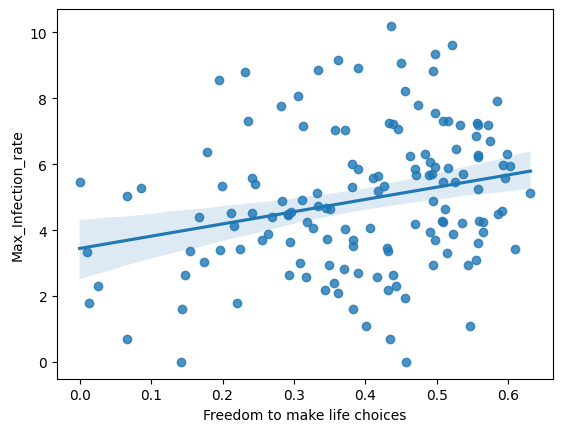

In [60]:
sns.regplot(x=x,y=np.log(y))